In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates
from matplotlib import text
import numpy as np
from datetime import datetime


In [231]:
cases = pd.read_csv('coronavirus-cases.csv')
cases.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases
0,England,E92000001,Country,17/04/2020,148.0,87022
1,East of England,E12000006,Region,17/04/2020,0.0,7203
2,London,E12000007,Region,17/04/2020,0.0,20904
3,North East,E12000001,Region,17/04/2020,0.0,5115
4,West Midlands,E12000005,Region,17/04/2020,16.0,9045


## Rename columns and remove spaces

In [232]:
df = cases.rename(columns={'Area name': 'Area_name', 'Area code': 'Area_code', 'Area type':'Area_Type', 'Specimen date': 'Specimen_date', 'Daily lab-confirmed cases': 'Daily_lab-confirmed_cases', 'Cumulative lab-confirmed cases': 'Cumulative_lab_confirmed_cases'  })
df.head()

,Area_name,Area_code,Area_Type,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,England,E92000001,Country,17/04/2020,148.0,87022
1,East of England,E12000006,Region,17/04/2020,0.0,7203
2,London,E12000007,Region,17/04/2020,0.0,20904
3,North East,E12000001,Region,17/04/2020,0.0,5115
4,West Midlands,E12000005,Region,17/04/2020,16.0,9045


## Drop the columns I don't want

In [233]:
df.drop(columns=['Area_code', 'Area_Type'], inplace=True)
df.head()

,Area_name,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,England,17/04/2020,148.0,87022
1,East of England,17/04/2020,0.0,7203
2,London,17/04/2020,0.0,20904
3,North East,17/04/2020,0.0,5115
4,West Midlands,17/04/2020,16.0,9045


## Create a York Stats DF

In [234]:
york_stats = df[df.Area_name == 'York']
york_stats.reset_index(inplace=True, drop=True)
york_stats.head()

,Area_name,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,York,17/04/2020,0.0,160
1,York,15/04/2020,7.0,160
2,York,14/04/2020,7.0,153
3,York,13/04/2020,12.0,146
4,York,12/04/2020,5.0,134


## Create a Blackpool Stats DF

In [235]:
blackpool_stats = df[df.Area_name == 'Blackpool']
blackpool_stats.reset_index(inplace=True, drop=True)
blackpool_stats.head()

,Area_name,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,Blackpool,17/04/2020,0.0,209
1,Blackpool,15/04/2020,13.0,209
2,Blackpool,14/04/2020,8.0,196
3,Blackpool,13/04/2020,15.0,188
4,Blackpool,12/04/2020,11.0,173


## Create a Scunny (Doncaster is closest) Stats DF

In [236]:
scunny_stats = df[df.Area_name == 'Doncaster']
scunny_stats.reset_index(inplace=True, drop=True)
scunny_stats.head()

,Area_name,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,Doncaster,17/04/2020,5.0,263
1,Doncaster,14/04/2020,3.0,258
2,Doncaster,13/04/2020,9.0,255
3,Doncaster,12/04/2020,8.0,246
4,Doncaster,11/04/2020,7.0,238


## Concat the Data ready to sort in date order (for the Graph)

In [237]:
combined_areas = pd.concat([york_stats, blackpool_stats, scunny_stats])
combined_areas.reset_index(inplace=True, drop=True)
combined_areas.head()

,Area_name,Specimen_date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,York,17/04/2020,0.0,160
1,York,15/04/2020,7.0,160
2,York,14/04/2020,7.0,153
3,York,13/04/2020,12.0,146
4,York,12/04/2020,5.0,134


## Convert the Date into a DateTime object for sorting later

In [238]:
temp_df = pd.DataFrame()
temp_df['date'] = pd.to_datetime(combined_areas['Specimen_date'], format='%d/%m/%Y')
temp_df.head()

,date
0,2020-04-17
1,2020-04-15
2,2020-04-14
3,2020-04-13
4,2020-04-12


## Create final DF for analysis

In [239]:
combined_areas = pd.concat([combined_areas, temp_df], axis=1)
combined_areas = combined_areas[['Area_name', 'date', 'Daily_lab-confirmed_cases', 'Cumulative_lab_confirmed_cases']]
combined_areas.head()

,Area_name,date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,York,2020-04-17,0.0,160
1,York,2020-04-15,7.0,160
2,York,2020-04-14,7.0,153
3,York,2020-04-13,12.0,146
4,York,2020-04-12,5.0,134


## Sort DF by date

In [243]:
ordered_by_date = combined_areas.sort_values(by='date')
ordered_by_date.reset_index(inplace=True, drop=True)
ordered_by_date.head()

,Area_name,date,Daily_lab-confirmed_cases,Cumulative_lab_confirmed_cases
0,York,2020-01-30,1.0,1
1,York,2020-03-02,1.0,2
2,Doncaster,2020-03-10,2.0,2
3,Blackpool,2020-03-10,1.0,1
4,York,2020-03-10,1.0,3


## Plot the Graph

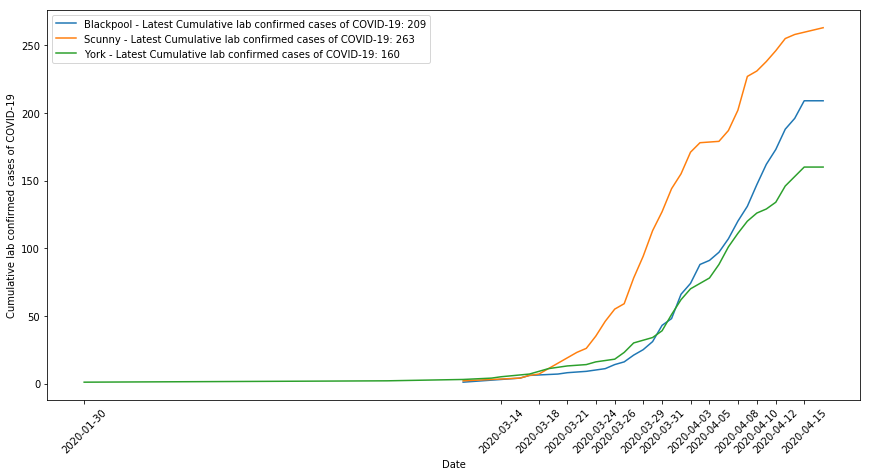

In [275]:
myFmt = mdates.DateFormatter('%d')

plt.figure(figsize=(12,6))

for name, data in ordered_by_date.groupby('Area_name'):
    plt.plot(data['date'], data['Cumulative_lab_confirmed_cases'], label=name)
    plt.tight_layout()
plt.xticks(ordered_by_date.date[::7], rotation=45)
plt.xlabel('Date')
plt.ylabel('Cumulative lab confirmed cases of COVID-19')
# plt.text(0.5, 0.5, 'matplotlib',fontsize=6 )
plt.legend(['Blackpool - Latest Cumulative lab confirmed cases of COVID-19: ' + str(blackpool_stats.Cumulative_lab_confirmed_cases[0]),
            'Scunny - Latest Cumulative lab confirmed cases of COVID-19: ' + str(scunny_stats.Cumulative_lab_confirmed_cases[0]),
            'York - Latest Cumulative lab confirmed cases of COVID-19: ' + str(york_stats.Cumulative_lab_confirmed_cases[0])])
plt.show()